<a href="https://colab.research.google.com/github/ARISH4651/titanic-data-analysis/blob/main/mini_project_on_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt


In [44]:
import seaborn as sns

In [45]:
data=pd.read_csv('/content/train.csv')

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
data.duplicated().sum()

np.int64(0)

In [49]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [50]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [52]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [54]:
data['Age'].isnull().sum()

np.int64(0)

In [55]:
data['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [56]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [57]:
data['Sex']=data['Sex'].map({'male': 0, 'female': 1})

In [58]:
data['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [59]:
data['Embarked']=data['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})

In [60]:
data['Embarked']

,Embarked
0,1
1,2
2,1
3,1
4,1
...,...
886,1
887,1
888,1
889,2


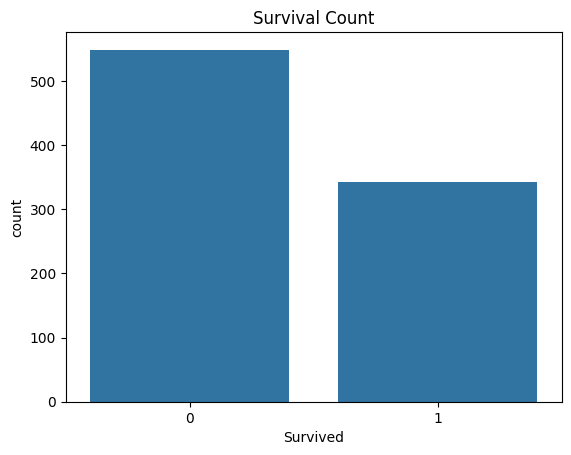

In [63]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()

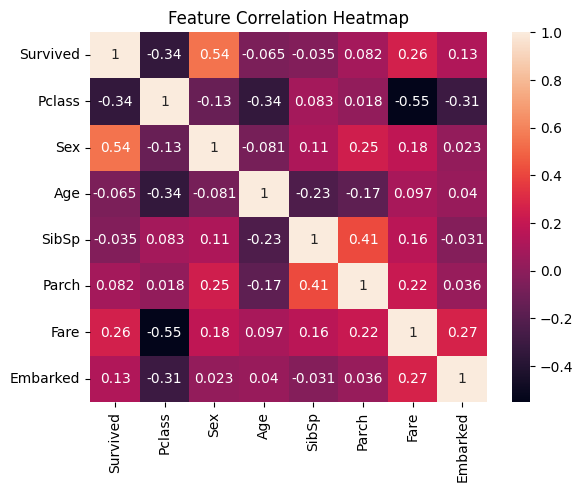

In [70]:
sns.heatmap(data.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [69]:
corr = data['Fare'].corr(data['Pclass'])
print("Correlation between Fare and Pclass:", corr)

Correlation between Fare and Pclass: -0.5494996199439074


In [72]:
data.to_csv("cleaned_titanic.csv", index=False)
